# Project 3 

Shuyao Wang 
11/28/20

# Part 1: Regression analysis of Gapminder data

In [1]:
import pandas as pd
data = pd.read_csv("gap.tsv", sep='\t')
data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns
from sklearn import linear_model
import math as math
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
!pip install pandas plotnine
from plotnine import *

### Exercise 1: Make a scatter plot of life expectancy across time.

Text(0, 0.5, 'Life Expectancy')

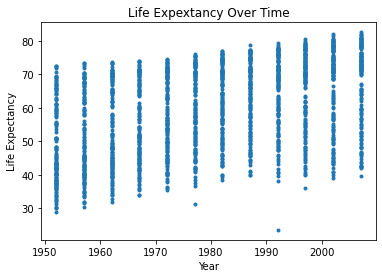

In [3]:
%matplotlib inline
plt.plot(data['year'], data['lifeExp'], ".")
plt.title("Life Expextancy Over Time")
plt.xlabel("Year")
plt.ylabel("Life Expectancy")

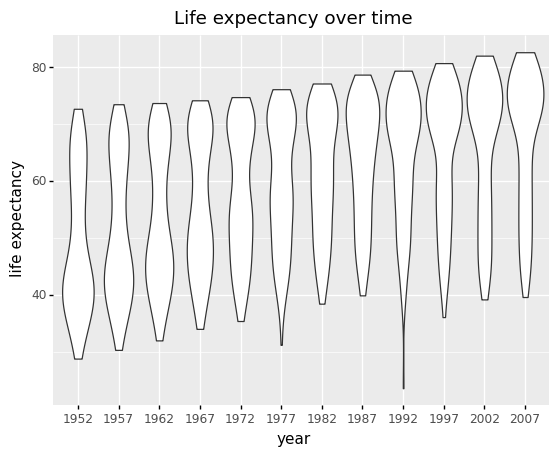

<ggplot: (8740651635333)>

In [4]:
data['years'] = data['year']
data['year_category'] = data['years'].astype("category")
ggplot(aes(x='year_category', y='lifeExp'), data=data) +\
    geom_violin() +\
    labs(title="Life expectancy over time",
         x = "year",
         y = "life expectancy")

### Question 1: Is there a general trend (e.g., increasing or decreasing) for life expectancy across time? Is this trend linear?

According to the graph above, I believe there is a general trend that the life expactancy is increaing across time (means there is a positive trend for life expectancy across time). And the trend is linear because when the time goes up, the expectancy becomes more concentrated at the top.

### Question 2: How would you describe the distribution of life expectancy across countries for individual years? Is it skewed, or not? Unimodal or not? Symmetric around it’s center?

The distribution of life expectancy changes from bottom-concentrated to top-concentrated over time. Before 1977, the distritution is concentrated on bottom and after the 1977 the distribution is concentrated on top.

It is skewed because there is a tail in 1962 and 1972 there appears bimodal distritution that the life expentencies concentrating around both ages 45 and 70, and in 1992 there are outliers that cause the skew. 

Some of them are not unimodal, because between 1961 and 1972 there are more than one mode in the graph (it is bimodal), but overall graph looks like unimodal.

It is not symmetric around its center because there is not a normal distribution. 


### Question 3: Suppose I fit a linear regression model of life expectancy vs. year (treating it as a continuous variable), and test for a relationship between year and life expectancy, will you reject the null hypothesis of no relationship? 

Yes, Since the graph shows a strong positive relationship between year and expectency, so I would reject the null hypothesis of no relationship

### Question 4: What would a violin plot of residuals from the linear model in Question 3 vs. year look like? 

I expect the violin plot of residuals should be linear,  since in question 3 I expect there is a linear relationship between life expectancy and year, and I think the violins distribution will have same shapes as the life expectancy violin plot. 

### Question 5: According to the assumptions of the linear regression model, what should that violin plot look like? 

I believe the violin plot should be linear relationship and the plot of the residuals will be centered around 0

### Exercise 2:Fit a linear regression model for life expectancy vs. year (as a continuous variable). 

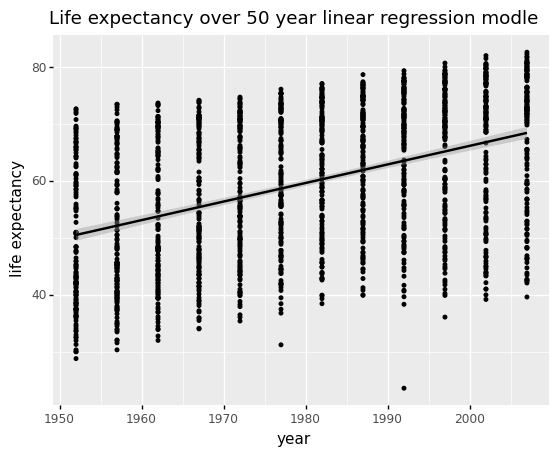

<ggplot: (8740641012378)>

In [5]:
ggplot(aes(x='year', y='lifeExp'), data=data) +\
    geom_point(size=1) +\
    geom_smooth(method = "lm", se=True, span=0.1) +\
    labs(title="Life expectancy over 50 year linear regression modle",
         x = "year",
         y = "life expectancy")

### Question 6: On average, by how much does life expectancy increase every year around the world?

life expectancy will be increased by 0.325904 each year on average (below code shows that the year coef is 0.325904)

In [6]:
result1 = ols(formula = "lifeExp ~ year", data = data).fit()
result1.params

Intercept   -585.652187
year           0.325904
dtype: float64

### Question 7: Do you reject the null hypothesis of no relationship between year and life expectancy? Why?

Yes, we reject the null hypothesis because the p value is very close to 0 (the value is 7.5467e-80 which is almost equal to 0) and it indicated that the probility that null hypothesis is true is very close to 0, thus we have strong evident that reject the null hyposthesis 

In [7]:
result = ols(formula = "lifeExp ~ year", data = data).fit()
result.f_pvalue

7.546794625598736e-80

### Exercise 3: Make a violin plot of residuals vs. year for the linear model from Exercise 2.

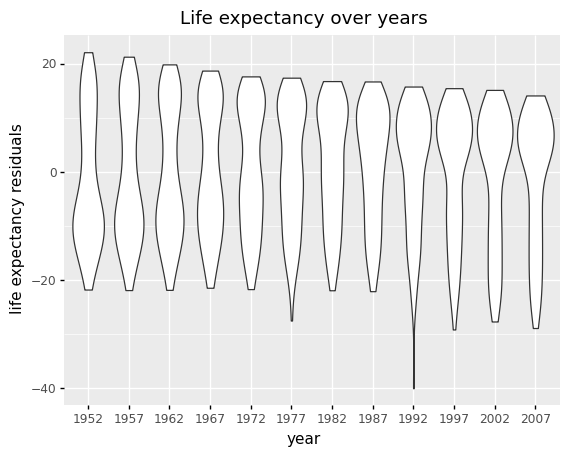

<ggplot: (8740641016302)>

In [8]:
reg = LinearRegression()
reg.fit(data[['year']] , data['lifeExp']) 
data['residual'] = data['lifeExp']  - reg.predict(data[['year']])
ggplot(aes(x='year_category', y='residual'), data=data) +\
    geom_violin() +\
    labs(title="Life expectancy over years",
         x = "year",
         y = "life expectancy residuals")

### Question 8: Does the plot of Exercise 3 match your expectations (as you answered Question 4)?

Yes. the violin plot above is linear and descending over time, and the shape of the violines are similar to the life experiency over time violin plot. The graph is skewed, with multimodal and centers around 0.

### Exercise 4: Make a boxplot (or violin plot) of model residuals vs. continent.

Text(0, 0.5, 'life expectancy residuals')

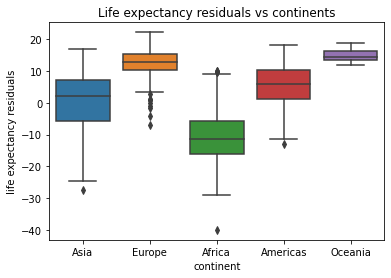

In [9]:
sns.boxplot(x = 'continent', y = 'residual', data = data)
plt.title("Life expectancy residuals vs continents")
plt.xlabel("continent")
plt.ylabel("life expectancy residuals")

### Question 9: Is there a dependence between model residual and continent? If so, what would that suggest when performing a regression analysis of life expectancy across time?

Yes, there is a dependence between model residual and continent, because the violins are different for each contient. this suggest that each the regression analysis for life expectancy across time  depended on both time and contient. and contients will affects the life expectancy across time by varying amount.

### Exercise 5: As in the Moneyball project, make a scatter plot of life expectancy vs. year, grouped by continent, and add a regression line


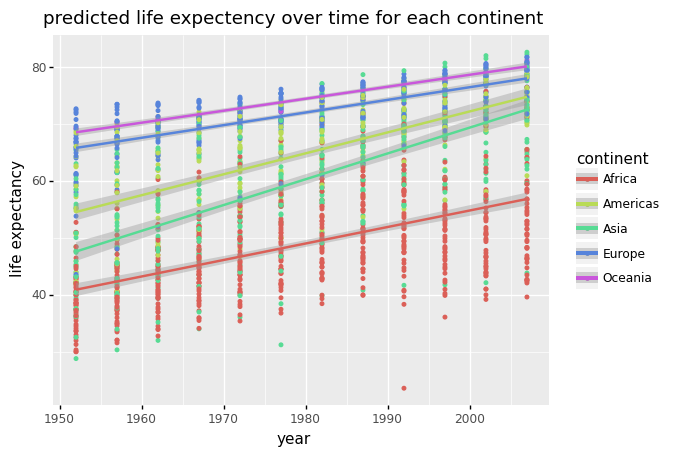

<ggplot: (8740640364797)>

In [10]:
ggplot(aes(x='year', y='lifeExp', color='continent'), data=data) +\
    geom_point(size=1) +\
    geom_smooth(method = "lm", se=True, span=0.1) +\
    labs(title="predicted life expectency over time for each continent",
         x = "year",
         y = "life expectancy")

### Question 10: Based on this plot, should your regression model include an interaction term for continent and year? Why?

Yes, the regression model include a interaction term for continent and year because the coeffiients for the linear models for each contient are all different, and they plays a significant role in effecting the life expactancy throughout time. So for more accurate regression model, interaction is needed to account the difference among continents. 

### Exercise 6: Fit a linear regression model for life expectancy including a term for an interaction between continent and year. 

In [11]:
regression = ols(formula = 'lifeExp ~ year * continent', data = data).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeExp   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     424.3
Date:                Fri, 04 Dec 2020   Prob (F-statistic):               0.00
Time:                        03:56:22   Log-Likelihood:                -5771.9
No. Observations:                1704   AIC:                         1.156e+04
Df Residuals:                    1694   BIC:                         1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   -524.2578     32.963    -15.904      0.000    -588.911    -459.605
continent[T.Americas]       -138.8484     57.851     -2.400      0.016    -252.315     -25.382
continent[T.Asia]           -312.6330     52.904     -5.909      0.000    -416.396    -208.870
continent[T.Europe]          156.8469     54.498      2.878      0.004      49.957     263.737
continent[T.Oceania]         182.3499    171.283      1.065      0.287    -153.599     518.298
year                           0.2895      0.017     17.387      0.000       0.257       0.322
year:continent[T.Americas]     0.0781      0.029      2.673      0.008       0.021       0.135
year:continent[T.Asia]         0.1636      0.027      6.121      0.000       0.111       0.216
year:continent[T.Europe]      -0.0676      0.028     -2.455      0.014      -0.122      -0.014
year:continent[T.Oceania]     -0.0793      0.087     -0.916      0.360      -0.249       0.090
==============================================================================
Omnibus:                       27.121   Durbin-Watson:                   0.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.106
Skew:                          -0.121   Prob(JB):                     2.65e-10
Kurtosis:                       3.750   Cond. No.                     2.09e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Question 11: Are all parameters in the model significantly different from zero? If not, which are not significantly different from zero?

Almost all parameters are very close to 0 because thier p value is less than 0.05. However Oceania's p value is 0.287 without interaction and it's p value is 0.36 with interaction. This means the Oceania is not significantly different from 0.

### Question 12: On average, by how much does life expectancy increase each year for each continent?

According to below form, we can found in average the life expectancy in Africa increases by 0.289529 per year, Americas increases by 0.367651 per year, Asia increases by 0.453122 per year, Europe increase 0.221932 per year, and Oceania increase  0.210272 per year

In [12]:
dummies = data['continent'].str.get_dummies(" ")
copy = dummies.copy()
for i, row in data.iterrows():
    copy.at[i, row['continent']] = row['year']
    
copy = copy.rename(columns={"Africa": "Africa_Interaction", 
                            "Asia": "Asia_Interaction",  
                            "Americas": "Americas_Interaction",
                                    "Europe": "Europe_Interaction",
                            "Oceania": "Oceania_Interaction"})
df = pd.concat([data, dummies, copy], axis=1, sort=False)
new_df = df[['year','Africa','Asia','Europe','Oceania',
             'Africa_Interaction','Asia_Interaction','Europe_Interaction'
             ,'Oceania_Interaction']]
reg = LinearRegression() 
reg.fit(new_df, df['lifeExp']) 

coeff = reg.coef_
coef = pd.DataFrame(coeff, new_df.columns, columns=['coefficient'])

year_coef = coef['coefficient']['year']
coefficient = (coef + year_coef).iloc[5:]

coefficient.loc['Americas_Interaction'] = year_coef

coefficient

,coefficient
Africa_Interaction,0.289529
Asia_Interaction,0.453122
Europe_Interaction,0.221932
Oceania_Interaction,0.210272
Americas_Interaction,0.367651


### Exercise 8: Make a residuals vs. year violin plot for the interaction model. Comment on how well it matches assumptions of the linear regression model.

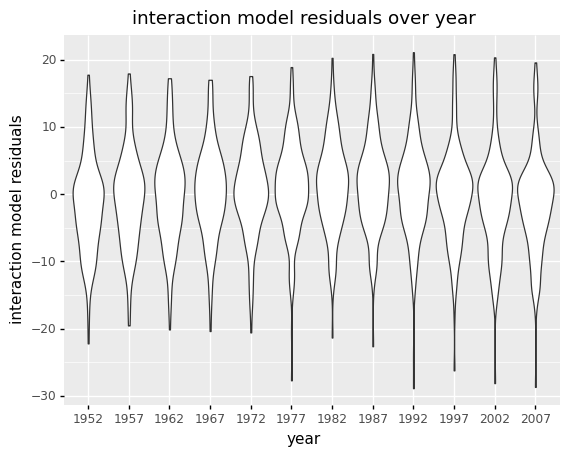

<ggplot: (8740640301617)>

In [13]:
df['residuals'] = df['lifeExp']- reg.predict(new_df) 
ggplot(aes(x='year_category', y='residuals'), data=df) +\
    geom_violin() +\
    labs(title="interaction model residuals over year",
         x = "year",
         y = "interaction model residuals")

# Part 2: Classification

### Problem 1 Implement the gradient descent algorithm (either batch or stochastic versions) for multiple linear regression. I.e., extend the version of the algorithm in the lecture notes to multiple parameters.

In [14]:
def grad_descent(X, y, T, alpha):
    
    # m is examples and n is features 
    m, n = X.shape  
    
    #initialize parameter
    theta = np.zeros(n)
    
    # computer the cost over time 
    cost = np.zeros(T) 
    
    for i in range(T):
        
        # loss for current parameter
        cost[i] = 0.5 * np.linalg.norm(X.dot(theta) - y)**2
        
        # compute steepest ascent
        gradient = X.T.dot(X.dot(theta) - y)
        
        # step down the gradient 
        theta = theta - alpha * gradient
        
    return theta, cost

### Problem 2 (This problem is +5 points of extra credit.) Derive the above update equation. Write the derivation in a markdown ipynb cell.
$$ \beta^{k+1} = \beta^k + \alpha *  \sum \limits _{i=1} ^{n} (y_{i} - \frac{e^{\beta^k*x_{i}}}{1+\beta^k*x_{i}}))x_{i} $$

### Problem 3 Implement the gradient descent algorithm (either batch or stochastic versions) for multiple logistic regression. I.e., modify your code in problem 1 for the logistic regression update equation.

In [15]:
def loss(x, y, theta):
    return y - (math.exp(np.dot(theta, x))) / (1 + math.exp(np.dot(theta, x)))

def logistic_grad_descent(X, Y, T, alpha):
    
     # m is examples and n is features 
    m, n = X.shape  
    
    #initialize parameter
    theta = np.zeros(n)
    
    # computer the cost over time 
    cost = np.zeros(m) 
    
    for i in range(T):
        for j in range(m):
            cost[j] = loss(X[j], Y[j], theta)
            grad = cost[j] * X[j]

        theta = theta + alpha * grad
        theta = theta / np.linalg.norm(theta)
        
    return theta, cost

### Problem 4 To test your programs, simulate data from the linear regression and logistic regression models and check that your implementations recover the simulation parameters properly.

In [16]:
import sklearn.datasets
import sklearn.linear_model as lm
from numpy import array
gen_data_x, gen_data_y = sklearn.datasets.make_regression(n_samples=100, 
                                                          n_features=20,
                                                          noise = 1.5)

# Generate data for logistic regression. This is similar to linear, only now
# values are either 0 or 1.  
log_gen_data_x, dump_y = sklearn.datasets.make_regression(n_samples=100, 
                                                          n_features=20, 
                                                          noise = 1.5)
log_gen_data_y = [0 if i>0 else 1 for i in dump_y]

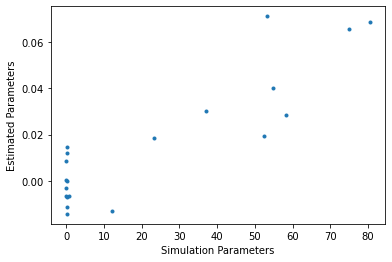

In [17]:
theta, cost = grad_descent(gen_data_x, gen_data_y, 100, .0000001)
reg = LinearRegression() 
reg.fit(gen_data_x, gen_data_y) 

plt.plot(reg.coef_, theta, '.')
plt.xlabel("Simulation Parameters")
plt.ylabel("Estimated Parameters")
plt.show()

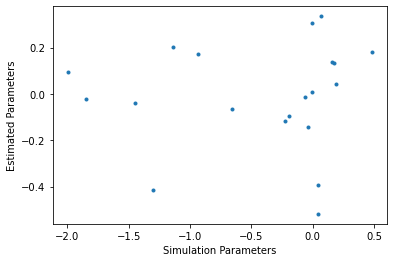

In [18]:
theta, cost = logistic_grad_descent(log_gen_data_x, log_gen_data_y, 
                                    100,.0000001)
reg = LogisticRegression()
reg.fit(log_gen_data_x, log_gen_data_y)

plt.plot(reg.coef_[0], theta, '.')
plt.xlabel("Simulation Parameters")
plt.ylabel("Estimated Parameters")
plt.show()

Compare the two graph above we can found tht gradient descent did better job than logistic gradient descent because it draws actually linear relationship with same amount of varibles. But it is the result from logistic gradient descent still seems reasonable, we just need add more manipulation of t and number of iterations into it to get the linear relationship. Both graph shows when numbers of simulation parameter goes up the estimated parameter increase, which is same to what we expected

# Try it out 

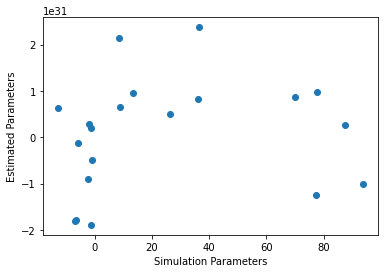

In [19]:
from sklearn.model_selection import cross_val_predict
from sklearn import datasets
from sklearn import tree
from sklearn import metrics
from sklearn import svm
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

# import classification dataset
iris = datasets.load_iris()
gen_data_x, gen_data_y = sklearn.datasets.make_regression(n_samples=20, 
                                                          n_features=20, 
                                                          noise = 1.5)

# Generate data for logistic regression. This is similar to linear, 
# only now values are either 0 or 1.  
log_gen_data_x, dump_y  = sklearn.datasets.make_regression(n_samples=100,
                                                           n_features=20, 
                                                           noise = 1.5)
log_gen_data_y = [0 if i>20 else 1 for i in dump_y]

# Gradient descent scores
theta, cost = grad_descent(log_gen_data_x, log_gen_data_y, 10, 10)
reg = LinearRegression() 
reg.fit(gen_data_x, gen_data_y) 

plt.plot(reg.coef_, theta, 'o')
plt.xlabel("Simulation Parameters")
plt.ylabel("Estimated Parameters")
plt.show()

In [20]:
# gradient descent score
theta, cost = logistic_grad_descent(log_gen_data_x, log_gen_data_y, 20, 20)
esti = np.zeros(len(log_gen_data_y))
for i in range(len(log_gen_data_x[0])):
    esti += log_gen_data_x[:, i] * theta[i]
esti += cost

In [21]:
# classification (or regression) trees
tree = tree.DecisionTreeClassifier()
result = cross_val_predict(tree, log_gen_data_x, log_gen_data_y, cv=10)
stats.ttest_rel(result, esti)

Ttest_relResult(statistic=6.188829555988479, pvalue=1.3764534115393363e-08)

In [22]:
# linear SVM
linear_svm = svm.LinearSVC()
result1 = cross_val_predict(linear_svm, log_gen_data_x, log_gen_data_y, cv=10)
stats.ttest_rel(result1, esti)

Ttest_relResult(statistic=7.166371241839416, pvalue=1.3953831360029678e-10)

In [23]:
# Random Forests
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                    random_state=50)
forest = RandomForestClassifier(n_estimators=100, random_state=0, 
                                max_features='sqrt')
result2 = cross_val_score(forest, X_train, y_train, cv=10)
forest.fit(X_train,y_train)
print(result2.mean())
print(forest.score(X_test,y_test))

0.9454545454545453
0.9473684210526315
